In [4]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV

In [3]:
df = pd.read_csv(r"C:\Users\gebruiker\IH_LESSONS\Projects\ML_Project_3\calories.csv")
df.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8   

   Calories  
0     231.0  
1      66.0  
2      26.0  
3      71.0  
4      35.0

### Exploratory Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  float64
 4   Weight      15000 non-null  float64
 5   Duration    15000 non-null  float64
 6   Heart_Rate  15000 non-null  float64
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 1.0+ MB


In [8]:
df.shape

(15000, 9)

In [10]:
df['Gender'].value_counts()

Gender
female    7553
male      7447
Name: count, dtype: int64

In [12]:
# Function to assign generation category
def assign_generation(Age):
    if Age < 11:
        return 'Generation Alpha'
    elif Age < 27:
        return 'Generation Z'
    elif Age < 43:
        return 'Millennials'
    elif Age < 58:
        return 'Generation X'
    elif Age < 76:
        return 'Baby Boomers'
    else:
        return 'Silent Generation'

# Apply function to create a new column
df["Generation"] = df["Age"].apply(assign_generation)

df.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8   

   Calories    Generation  
0     231.0  Baby Boomers  
1      66.0  Generation Z  
2      26.0  Baby Boomers  
3      71.0   Millennials  
4      35.0   Millennials

In [14]:
#Average duration and calories by gender and generation
avg_dur_cal = df.groupby(["Generation", "Gender"])[["Duration", "Calories","Weight"]].mean().reset_index()
avg_dur_cal

Generation  Gender   Duration    Calories     Weight
0       Baby Boomers  female  15.821308   96.609575  64.634525
1       Baby Boomers    male  15.785566  111.131159  88.553088
2       Generation X  female  15.551321   90.181315  63.966195
3       Generation X    male  15.310006   94.471455  87.701657
4       Generation Z  female  15.293103   81.419951  61.772167
5       Generation Z    male  15.641427   75.485607  84.701502
6        Millennials  female  15.408307   85.290361  62.803683
7        Millennials    male  15.547857   84.016820  86.263516
8  Silent Generation  female  15.599251   97.138577  65.142322
9  Silent Generation    male  15.482270  116.393617  89.953901

In [16]:
# Calculate BMI (Body Mass Index) using formula: weight (kg) / height (m)^2
df["BMI"] = df["Weight"] / (df["Height"] / 100) ** 2

# Define BMI segmentation categories
def bmi_category(bmi):
    if bmi < 18.5:
        return "Underweight"
    elif 18.5 <= bmi < 24.9:
        return "Normal weight"
    elif 25.0 <= bmi < 29.9:
        return "Overweight"
    else:
        return "Obese"

# Apply segmentation
df["Weight_Category"] = df["BMI"].apply(bmi_category)
df.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1  14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2  11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3  16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4  17771927  female   27   154.0    58.0      10.0        81.0       39.8   

   Calories    Generation        BMI Weight_Category  
0     231.0  Baby Boomers  26.038781      Overweight  
1      66.0  Generation Z  21.773842   Normal weight  
2      26.0  Baby Boomers  24.655910   Normal weight  
3      71.0   Millennials  22.159109   Normal weight  
4      35.0   Millennials  24.456063   Normal weight

In [18]:
# Count occurrences of each Weight_Category
weight_category_counts = df["Weight_Category"].value_counts()

# Calculate ratio considering the entire dataframe
weight_category_ratio = (weight_category_counts / len(df)) * 100  # Convert to percentage
weight_category_ratio

Weight_Category
Normal weight    62.326667
Overweight       34.720000
Obese             2.953333
Name: count, dtype: float64

In [20]:
# Creating the pivot table
pivot_table = df.pivot_table(
    values=["Duration", "Heart_Rate", "Body_Temp"], 
    index="Weight_Category",
    aggfunc="mean"
)

# Display the pivot table
pivot_table

Body_Temp   Duration  Heart_Rate
Weight_Category                                  
Normal weight    40.021371  15.499840   95.439191
Obese            39.999323  15.320542   95.455982
Overweight       40.035004  15.603687   95.666283

In [22]:
# Count occurrences of each Weight_Category per Generation
pivot_table = df.pivot_table(
    values="User_ID", 
    index="Generation", 
    columns="Weight_Category", 
    aggfunc="count", 
    fill_value=0
)
# Sorting by 'Obese' count in descending order
pivot_table = pivot_table.sort_values(by="Obese", ascending=False)

# Display the pivot table
pivot_table

Weight_Category    Normal weight  Obese  Overweight
Generation                                         
Millennials                 3346    140        1563
Baby Boomers                1478    100        1346
Generation X                1902     99        1255
Generation Z                2393     81         748
Silent Generation            230     23         296

In [24]:
# Calculating the ratio in percentage
total_users = df["User_ID"].count()
pivot_table_percentage = (pivot_table / total_users) * 100  # Convert to percentage
pivot_table_percentage

Weight_Category    Normal weight     Obese  Overweight
Generation                                            
Millennials            22.306667  0.933333   10.420000
Baby Boomers            9.853333  0.666667    8.973333
Generation X           12.680000  0.660000    8.366667
Generation Z           15.953333  0.540000    4.986667
Silent Generation       1.533333  0.153333    1.973333

In [26]:
df.describe()

User_ID           Age        Height        Weight      Duration  \
count  1.500000e+04  15000.000000  15000.000000  15000.000000  15000.000000   
mean   1.497736e+07     42.789800    174.465133     74.966867     15.530600   
std    2.872851e+06     16.980264     14.258114     15.035657      8.319203   
min    1.000116e+07     20.000000    123.000000     36.000000      1.000000   
25%    1.247419e+07     28.000000    164.000000     63.000000      8.000000   
50%    1.499728e+07     39.000000    175.000000     74.000000     16.000000   
75%    1.744928e+07     56.000000    185.000000     87.000000     23.000000   
max    1.999965e+07     79.000000    222.000000    132.000000     30.000000   

         Heart_Rate     Body_Temp      Calories           BMI  
count  15000.000000  15000.000000  15000.000000  15000.000000  
mean      95.518533     40.025453     89.539533     24.344900  
std        9.583328      0.779230     62.456978      1.558784  
min       67.000000     37.100000      1.000000     19.227688  
25%       88.000000     39.600000     35.000000     23.243408  
50%       96.000000     40.200000     79.000000     24.376731  
75%      103.000000     40.600000    138.000000     25.492722  
max      128.000000     41.500000    314.000000     29.069767

<Axes: xlabel='Duration', ylabel='Calories'>

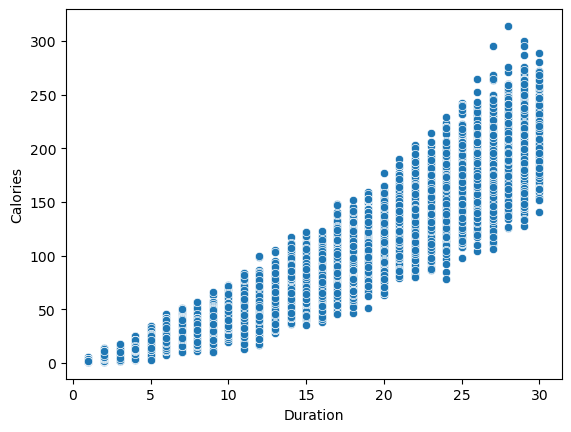

In [28]:
sns.scatterplot(x=df['Duration'],y=df['Calories'])

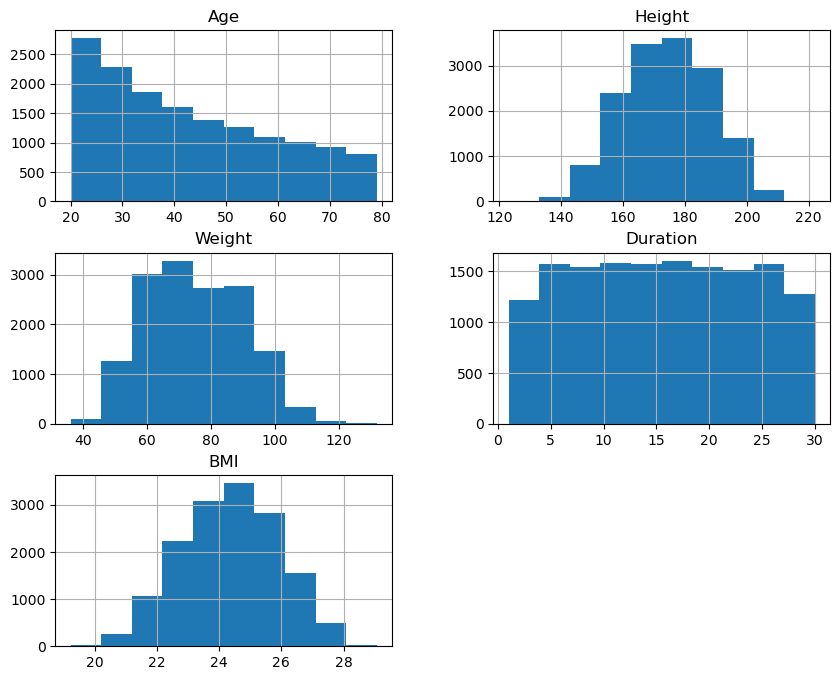

In [30]:
df[["Age", "Height", "Weight", "Duration", "BMI"]].hist(figsize=(10,8))  # Histogram visualization
plt.show()


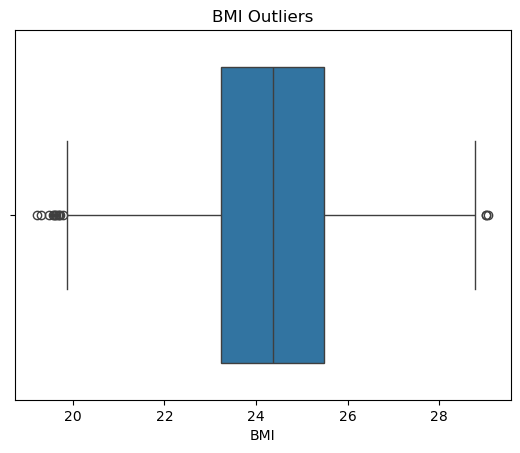

In [32]:
#checking outliers BMI

sns.boxplot(x=df["BMI"])  # Checking for extreme values
plt.title("BMI Outliers")
plt.show()

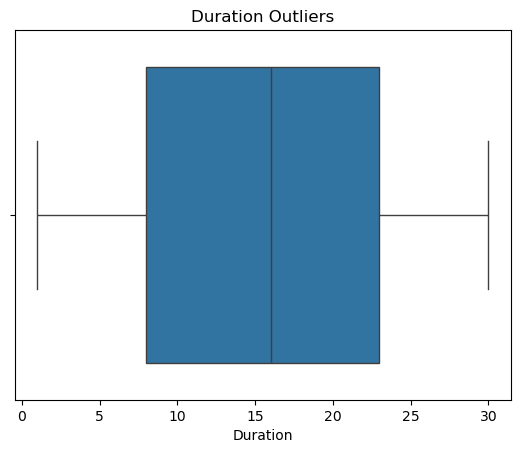

In [34]:
#checking outliers Duration
sns.boxplot(x=df["Duration"])  # Checking for extreme values
plt.title("Duration Outliers")
plt.show()

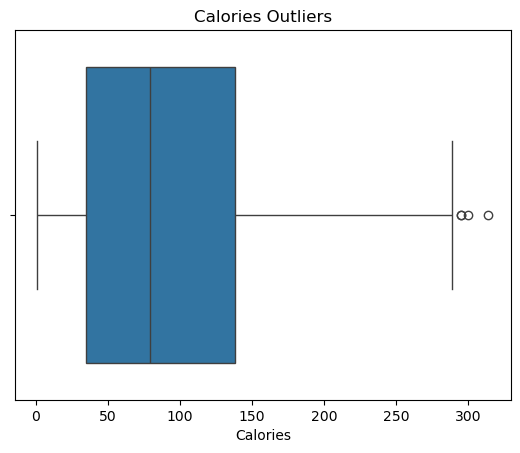

In [36]:
#checking outliers Calories
sns.boxplot(x=df["Calories"])  # Checking for extreme values
plt.title("Calories Outliers")
plt.show()

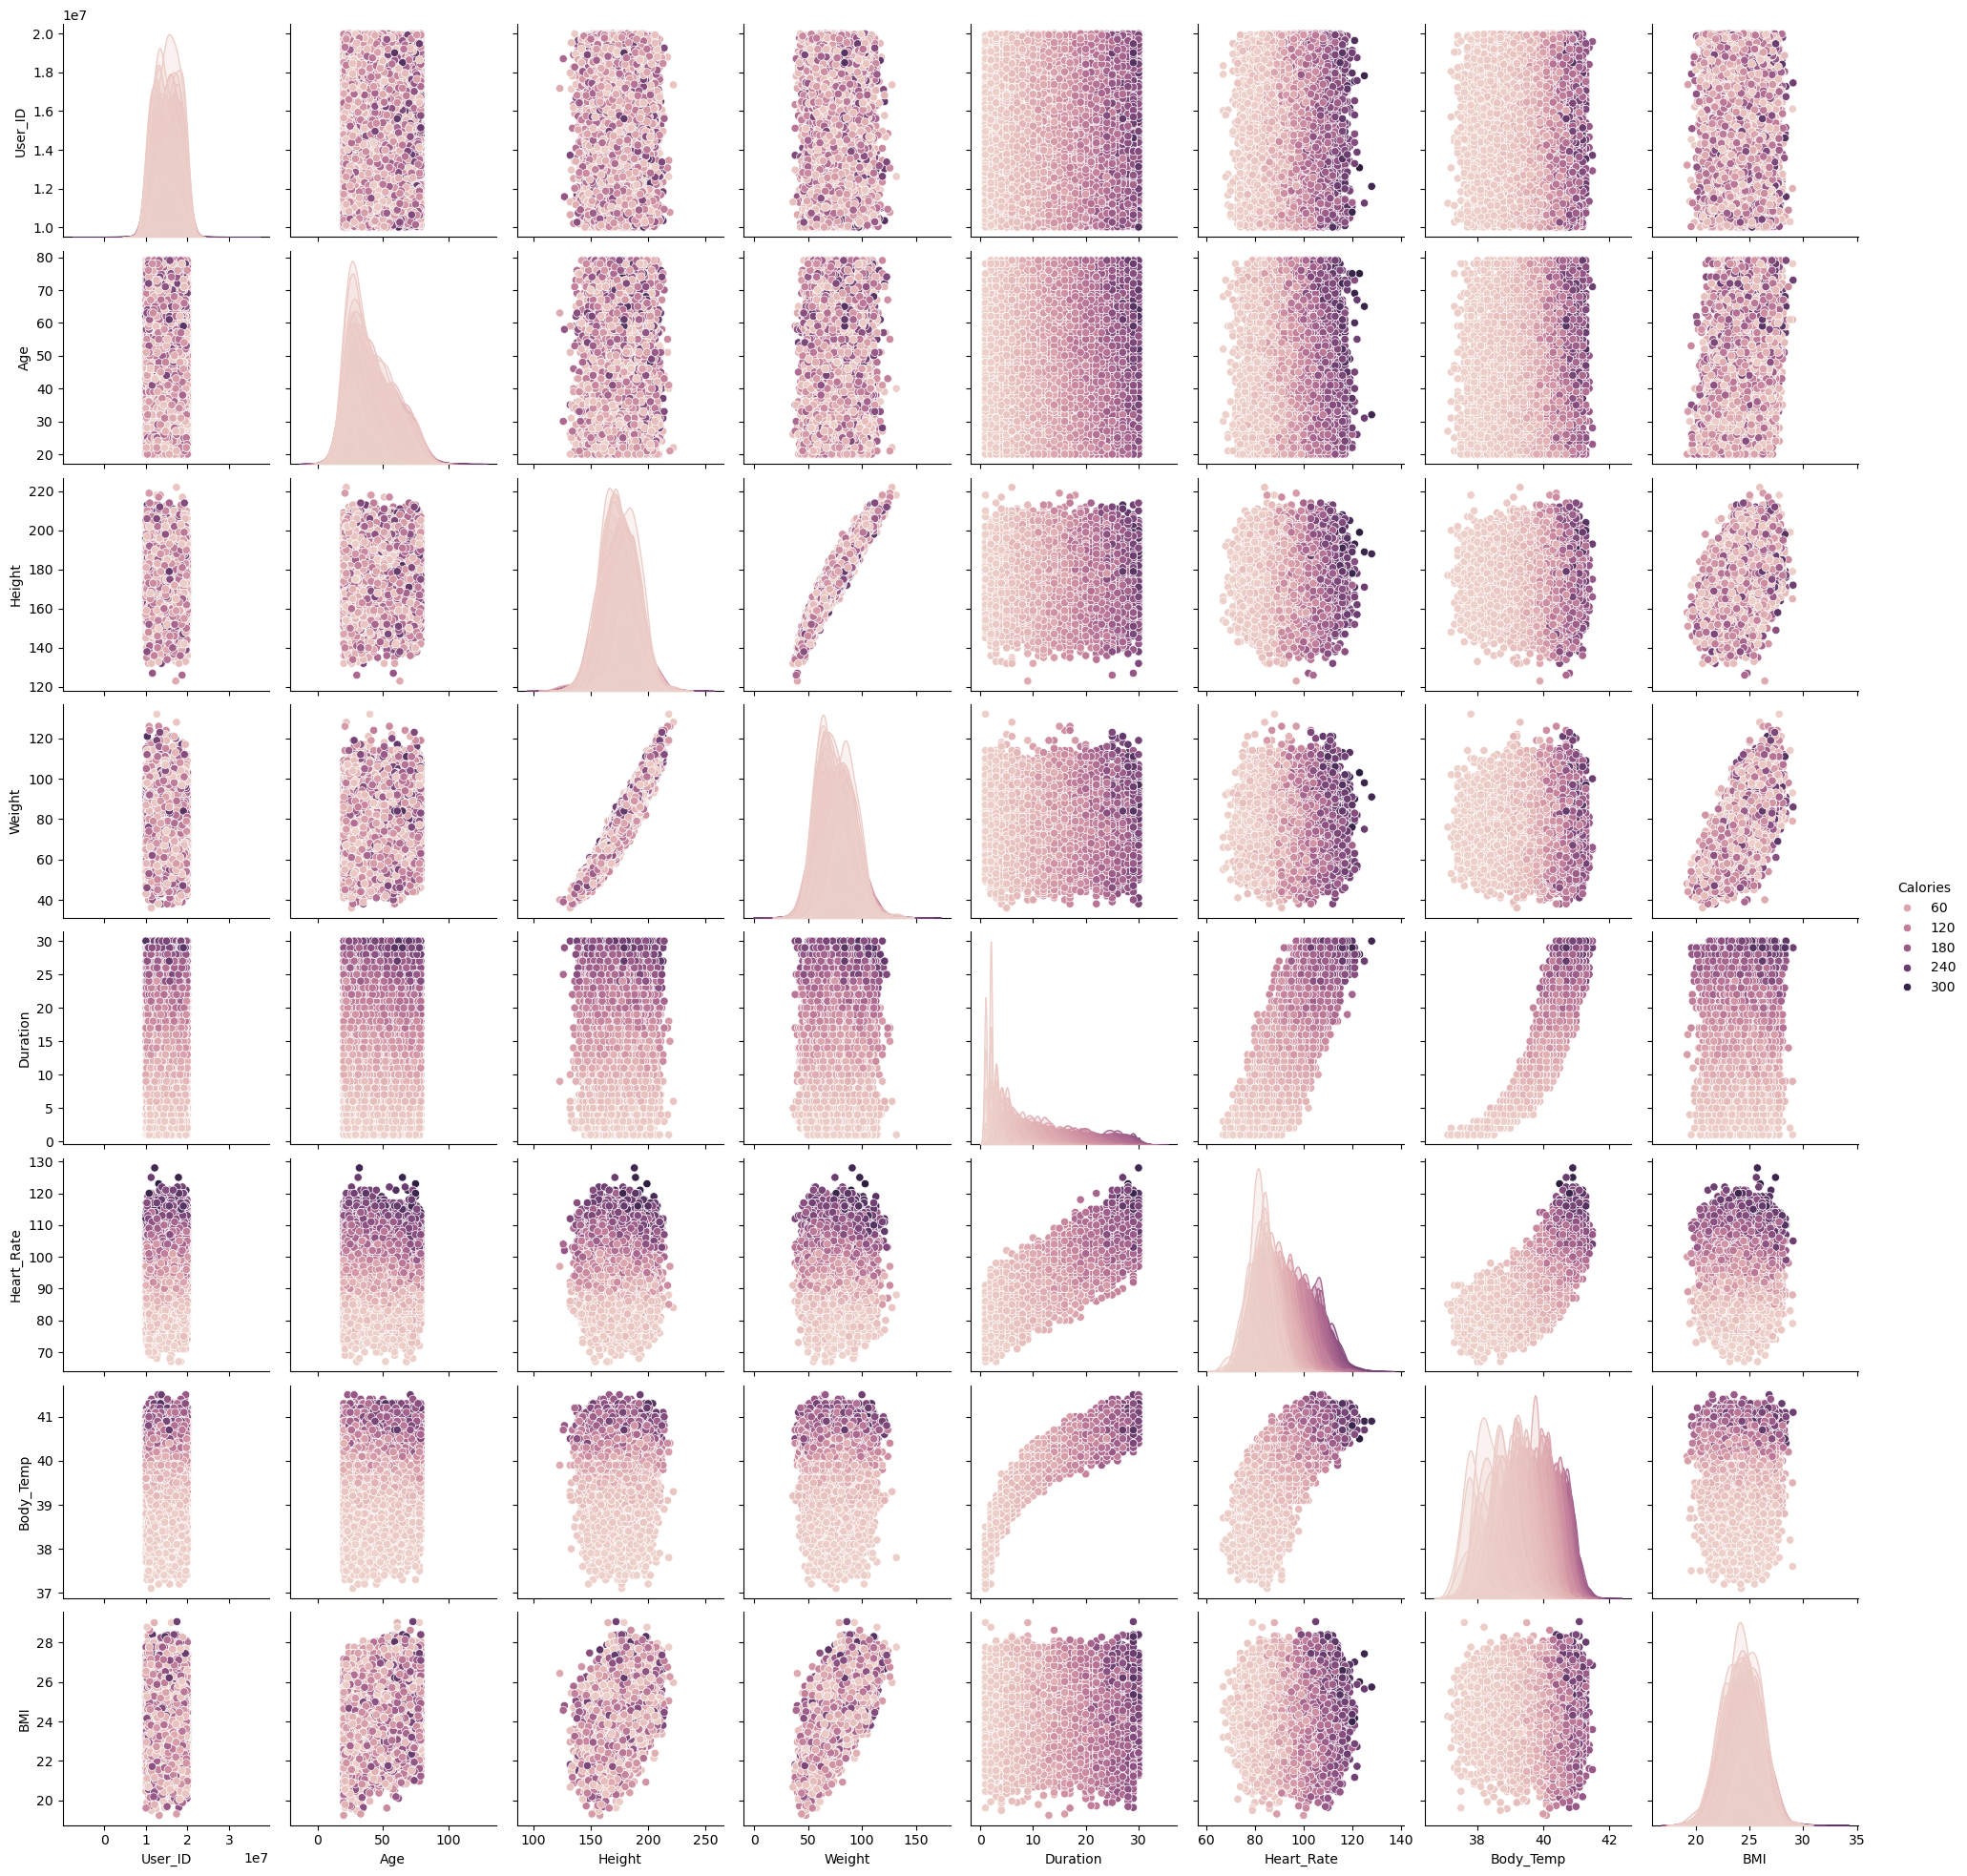

In [922]:
# Quick EDA with all variables
sns.pairplot(df, hue="Calories")
plt.show()

In [38]:
#LabelEncoder 0 = Female and 1 = Male 
label_encoder = LabelEncoder()
df["Gender"] = label_encoder.fit_transform(df["Gender"])

In [40]:
df.head()

User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0  14733363       1   68   190.0    94.0      29.0       105.0       40.8   
1  14861698       0   20   166.0    60.0      14.0        94.0       40.3   
2  11179863       1   69   179.0    79.0       5.0        88.0       38.7   
3  16180408       0   34   179.0    71.0      13.0       100.0       40.5   
4  17771927       0   27   154.0    58.0      10.0        81.0       39.8   

   Calories    Generation        BMI Weight_Category  
0     231.0  Baby Boomers  26.038781      Overweight  
1      66.0  Generation Z  21.773842   Normal weight  
2      26.0  Baby Boomers  24.655910   Normal weight  
3      71.0   Millennials  22.159109   Normal weight  
4      35.0   Millennials  24.456063   Normal weight

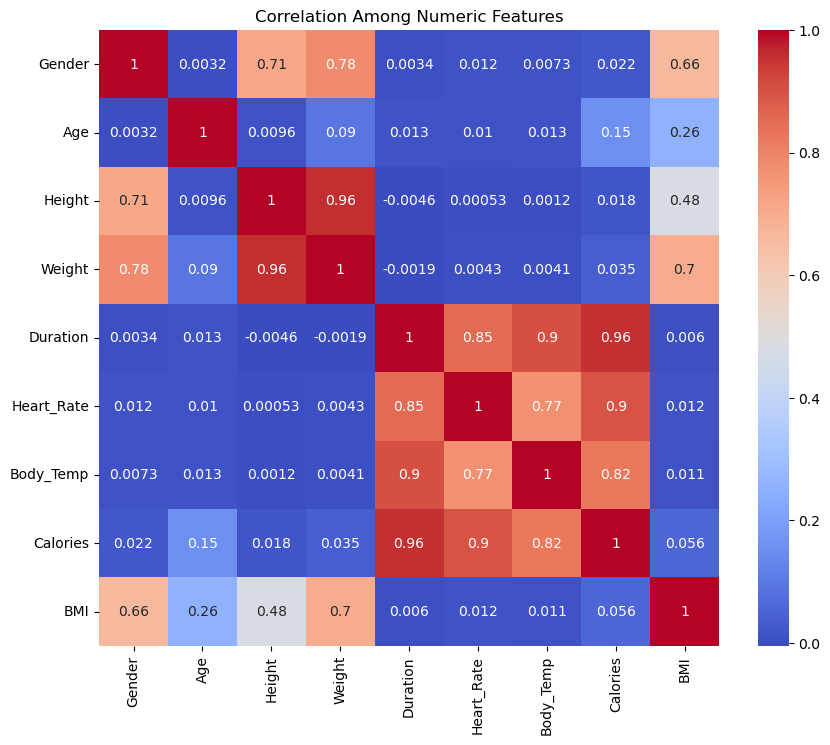

In [42]:
# Ensure Gender is included in features
df_num = df.drop(columns=["User_ID", "Generation", "Weight_Category"])  # Keep Gender and other numeric features
# Correlation matrix
corr = df_num.corr()

# Plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Among Numeric Features')
plt.show()

In [44]:
#Correlation Coefficients:
#Values range from -1 to 1.
#1 indicates a perfect positive correlation.
#-1 indicates a perfect negative correlation.
#0 indicates no correlation.

#Key Observations:

#Strong Positive Correlations (close to 1.0)
#Height & Weight (0.96) → Taller individuals tend to weigh more.
#Duration & Heart Rate (0.85) → Longer workouts often lead to increased heart rates.
#Duration & Body Temperature (0.90) → Exercise duration impacts body temperature.
#Heart Rate & Body Temperature (0.77) → Higher heart rates are associated with higher body temperature.

#Duration & Calories Burned (0.96) → Longer exercise durations result in higher calorie expenditure.
#Heart Rate & Calories Burned (0.90) → A higher heart rate means greater calorie burning.
#Body Temperature & Calories Burned (0.82) → Elevated body temperature indicates more energy expenditure.

In [46]:
new_columns = [
    'User_ID','Gender', 'Height', 'Duration', 'Heart_Rate', 'Body_Temp', 
    'Calories', 'Generation', 'BMI', 'Weight_Category'
]
df_new = df[new_columns]
df_new.head()

User_ID  Gender  Height  Duration  Heart_Rate  Body_Temp  Calories  \
0  14733363       1   190.0      29.0       105.0       40.8     231.0   
1  14861698       0   166.0      14.0        94.0       40.3      66.0   
2  11179863       1   179.0       5.0        88.0       38.7      26.0   
3  16180408       0   179.0      13.0       100.0       40.5      71.0   
4  17771927       0   154.0      10.0        81.0       39.8      35.0   

     Generation        BMI Weight_Category  
0  Baby Boomers  26.038781      Overweight  
1  Generation Z  21.773842   Normal weight  
2  Baby Boomers  24.655910   Normal weight  
3   Millennials  22.159109   Normal weight  
4   Millennials  24.456063   Normal weight

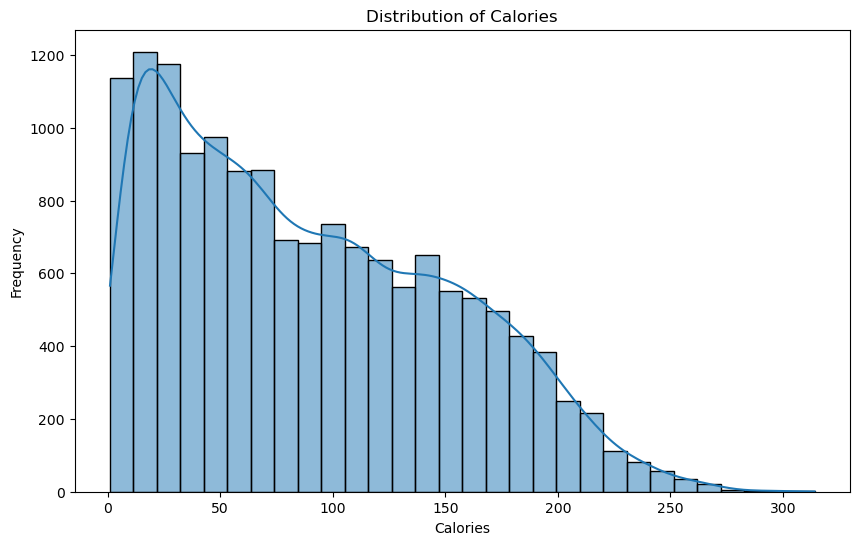

In [48]:
plt.figure(figsize=(10,6))
sns.histplot(df_new["Calories"], bins=30, kde=True)
plt.title('Distribution of Calories')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()

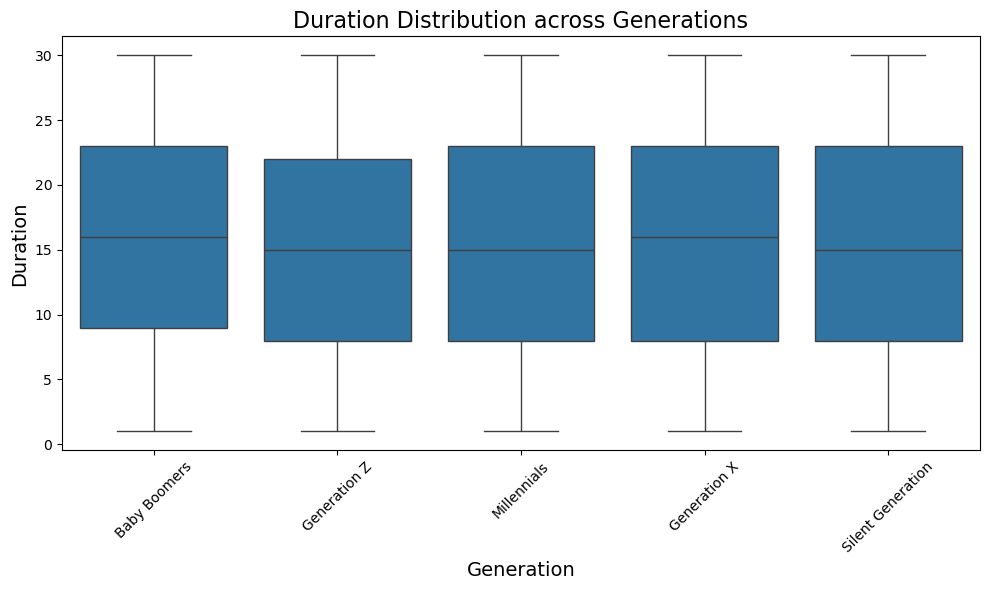

In [50]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Generation', y='Duration', data=df_new)
plt.title('Duration Distribution across Generations', fontsize=16)
plt.xlabel('Generation', fontsize=14)
plt.ylabel('Duration', fontsize=14)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

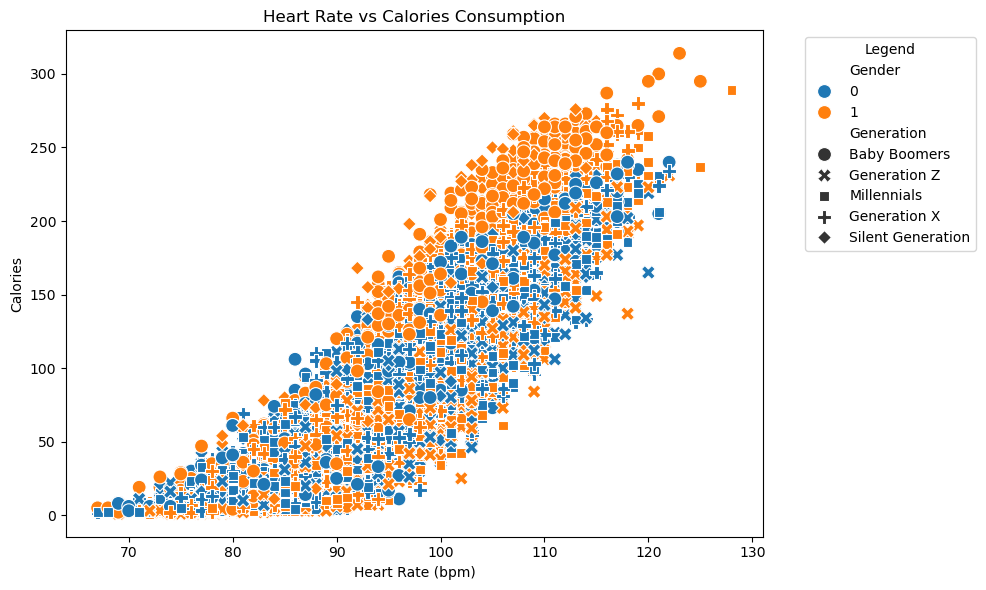

In [52]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_new, x='Heart_Rate', y='Calories', hue='Gender', style='Generation', s=100)

plt.title('Heart Rate vs Calories Consumption')
plt.xlabel('Heart Rate (bpm)')
plt.ylabel('Calories')
plt.legend(title='Legend', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

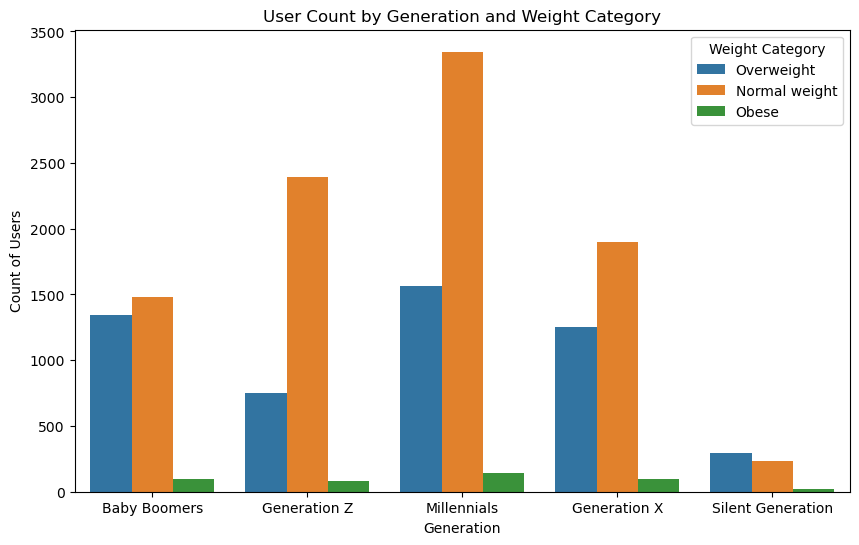

In [54]:
plt.figure(figsize=(10,6))
sns.countplot(data=df_new, x='Generation', hue='Weight_Category')

plt.title('User Count by Generation and Weight Category')
plt.xlabel('Generation')
plt.ylabel('Count of Users')
plt.legend(title='Weight Category')
plt.show()

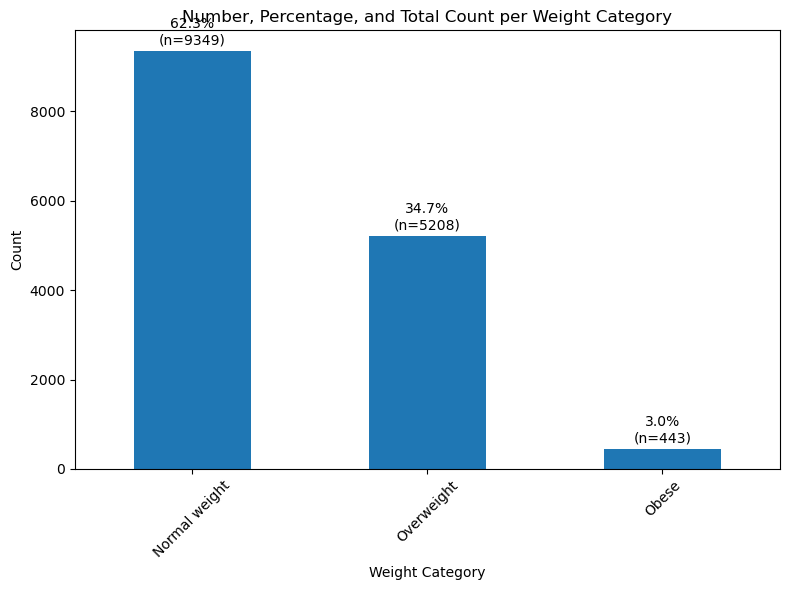

In [56]:
weight_counts = df_new['Weight_Category'].value_counts()

# Total number of entries
total = weight_counts.sum()

# Plot
fig, ax = plt.subplots(figsize=(8,6))
bars = weight_counts.plot(kind='bar', ax=ax)

# Add percentage and total count labels on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    percentage = (height / total) * 100
    count = int(height)
    ax.annotate(f'{percentage:.1f}%\n(n={count})',
                (bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3),  # Slightly above the bar
                textcoords='offset points',
                ha='center', va='bottom')

plt.title('Number, Percentage, and Total Count per Weight Category')
plt.xlabel('Weight Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

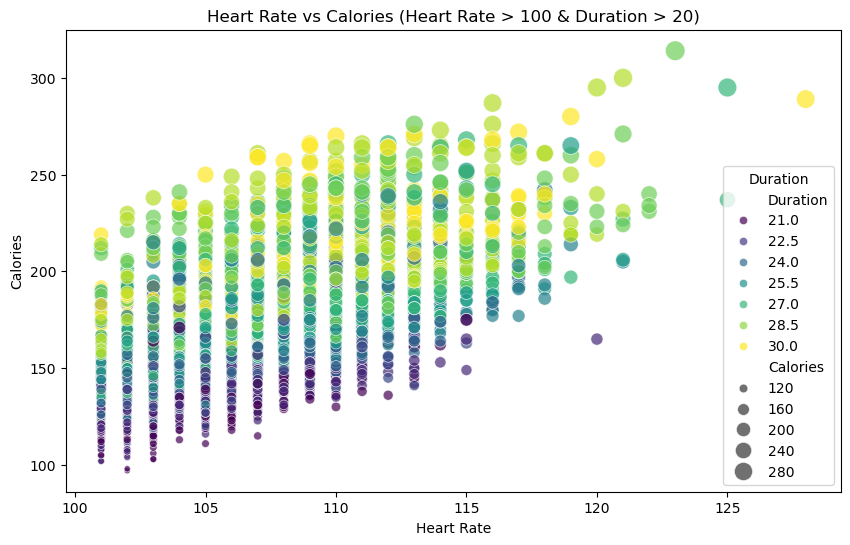

In [58]:
# Filter the DataFrame
filtered_df = df_new[(df_new['Heart_Rate'] > 100) & (df_new['Duration'] > 20)]

# Plot Heart Rate vs Calories with Calories as size
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=filtered_df,
    x='Heart_Rate',
    y='Calories',
    size='Calories',
    sizes=(20, 200),
    hue='Duration',
    palette='viridis',
    alpha=0.7
)

plt.title('Heart Rate vs Calories (Heart Rate > 100 & Duration > 20)')
plt.xlabel('Heart Rate')
plt.ylabel('Calories')
plt.legend(title='Duration')
plt.show()

In [60]:
dummies = pd.get_dummies(df[['Generation', 'Weight_Category']], drop_first=False)

df_with_dummies = pd.concat([df_new, dummies], axis=1)
df_with_dummies.head()

User_ID  Gender  Height  Duration  Heart_Rate  Body_Temp  Calories  \
0  14733363       1   190.0      29.0       105.0       40.8     231.0   
1  14861698       0   166.0      14.0        94.0       40.3      66.0   
2  11179863       1   179.0       5.0        88.0       38.7      26.0   
3  16180408       0   179.0      13.0       100.0       40.5      71.0   
4  17771927       0   154.0      10.0        81.0       39.8      35.0   

     Generation        BMI Weight_Category  Generation_Baby Boomers  \
0  Baby Boomers  26.038781      Overweight                     True   
1  Generation Z  21.773842   Normal weight                    False   
2  Baby Boomers  24.655910   Normal weight                     True   
3   Millennials  22.159109   Normal weight                    False   
4   Millennials  24.456063   Normal weight                    False   

   Generation_Generation X  Generation_Generation Z  Generation_Millennials  \
0                    False                    False                   False   
1                    False                     True                   False   
2                    False                    False                   False   
3                    False                    False                    True   
4                    False                    False                    True   

   Generation_Silent Generation  Weight_Category_Normal weight  \
0                         False                          False   
1                         False                           True   
2                         False                           True   
3                         False                           True   
4                         False                           True   

   Weight_Category_Obese  Weight_Category_Overweight  
0                  False                        True  
1                  False                       False  
2                  False                       False  
3                  False                       False  
4                  False                       False

### Train Test Split

In [63]:
X = df_with_dummies.drop(columns = ["User_ID","Height","Body_Temp","Calories","Generation","Weight_Category","BMI"])
y= df_with_dummies["Calories"]

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [67]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [69]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [71]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [73]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=10)

In [75]:
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.9868042145507973

In [77]:
#k-NN model is performing exceptionally well, with an impressive accuracy of 98.78% on test data. 
#That’s a strong indication that the model is well-trained and generalizing effectively.
#However:
#Check for Overfitting
#Normalize Features, ensuring features are properly scaled (using MinMaxScaler or StandardScaler) can enhance accuracy.
#Cross-Validation

### Feature Engineering

In [80]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_train_scaled.head()

Gender  Duration  Heart_Rate  Generation_Baby Boomers  \
0  1.001501 -0.903038   -0.051801                 -0.49596   
1 -0.998501 -0.782820   -0.364380                 -0.49596   
2 -0.998501  0.178925   -0.781152                 -0.49596   
3 -0.998501 -0.782820   -1.093731                 -0.49596   
4  1.001501 -1.143475   -0.468573                 -0.49596   

   Generation_Generation X  Generation_Generation Z  Generation_Millennials  \
0                -0.529408                -0.525149               -0.704457   
1                 1.888901                -0.525149               -0.704457   
2                -0.529408                 1.904222               -0.704457   
3                -0.529408                 1.904222               -0.704457   
4                -0.529408                -0.525149                1.419534   

   Generation_Silent Generation  Weight_Category_Normal weight  \
0                      5.187194                      -1.288245   
1                     -0.192782                       0.776250   
2                     -0.192782                       0.776250   
3                     -0.192782                       0.776250   
4                     -0.192782                       0.776250   

   Weight_Category_Obese  Weight_Category_Overweight  
0              -0.172306                    1.371299  
1              -0.172306                   -0.729236  
2              -0.172306                   -0.729236  
3              -0.172306                   -0.729236  
4              -0.172306                   -0.729236

In [82]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)
X_test_scaled.head()

Gender  Duration  Heart_Rate  Generation_Baby Boomers  \
0 -0.998501 -0.782820   -0.155994                 -0.49596   
1  1.001501 -1.143475   -1.406310                 -0.49596   
2 -0.998501  0.780015   -0.051801                 -0.49596   
3  1.001501  1.621542    1.615286                 -0.49596   
4 -0.998501  0.419361    0.781742                 -0.49596   

   Generation_Generation X  Generation_Generation Z  Generation_Millennials  \
0                -0.529408                -0.525149                1.419534   
1                -0.529408                -0.525149                1.419534   
2                -0.529408                -0.525149                1.419534   
3                -0.529408                -0.525149                1.419534   
4                -0.529408                -0.525149               -0.704457   

   Generation_Silent Generation  Weight_Category_Normal weight  \
0                     -0.192782                        0.77625   
1                     -0.192782                        0.77625   
2                     -0.192782                        0.77625   
3                     -0.192782                        0.77625   
4                      5.187194                        0.77625   

   Weight_Category_Obese  Weight_Category_Overweight  
0              -0.172306                   -0.729236  
1              -0.172306                   -0.729236  
2              -0.172306                   -0.729236  
3              -0.172306                   -0.729236  
4              -0.172306                   -0.729236

In [84]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=10)

In [86]:
knn.score(X_test_scaled, y_test)

0.9912485734157317

In [88]:
#KNN higher than before 99.12% vs 98.78%

### Ensemble Methods

#### Bagging

In [92]:
##Bagging
bagging_reg = BaggingRegressor(DecisionTreeRegressor(max_depth=6), n_estimators=100, max_samples = 1000)
bagging_reg.fit(X_train_scaled, y_train)

BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=6), max_samples=1000,
                 n_estimators=100)

In [94]:
pred = bagging_reg.predict(X_test_scaled)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", bagging_reg.score(X_test_scaled, y_test))

MAE 5.743071076542861
RMSE 8.736868804289482
R2 score 0.9802176570460949


C:\Users\gebruiker\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


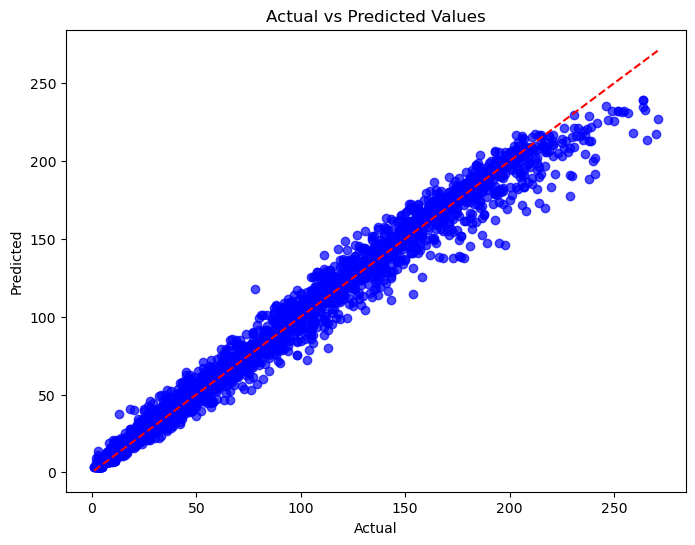

In [96]:
# Plot actual vs predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

#### AdaBoost

In [99]:
##AdaBoost
ada_reg = AdaBoostRegressor(DecisionTreeRegressor(max_depth=20),n_estimators=100)
ada_reg.fit(X_train_scaled, y_train)

AdaBoostRegressor(estimator=DecisionTreeRegressor(max_depth=20),
                  n_estimators=100)

In [100]:
pred = ada_reg.predict(X_test_scaled)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", ada_reg.score(X_test_scaled, y_test))

MAE 3.5609872165899192
RMSE 5.0387167194421725
R2 score 0.9934203016511659


C:\Users\gebruiker\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


#### RandomForest

In [104]:
##RandomForest
rf_model = RandomForestRegressor(n_estimators=100, random_state=20)
rf_model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=20)

In [105]:
pred_rf = rf_model.predict(X_test_scaled)

print("MAE", mean_absolute_error(pred_rf, y_test))
print("RMSE", mean_squared_error(pred_rf, y_test, squared=False))
print("R2 score", rf_model.score(X_test_scaled, y_test))

MAE 3.133121963063711
RMSE 4.78063268123061
R2 score 0.9940770665859293


C:\Users\gebruiker\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [108]:
# #Model Evaluation Metrics:**

## MAE (Mean Absolute Error): 3.13
## Meaning: On average, the predicted values differ from the actual values by about 3.13 units.
## Interpretation: The average prediction error is approximately 3 units, which indicates fairly accurate predictions relative to the target variable's scale.

## RMSE (Root Mean Squared Error): 4.78
## Meaning: The typical deviation between predicted and actual values is about 4.78 units.
## Interpretation: Slightly higher than MAE, reflecting the model's error magnitude; still suggesting good performance.

## R² (Coefficient of Determination): 0.994
## Meaning: Approximately 99.41% of the variance in actual target values is explained by the model.
## Interpretation: The model fits the data very well, with predictions closely aligning with true values.

In [110]:
rf_model.feature_importances_

array([7.69180985e-03, 9.16441191e-01, 5.04432571e-02, 9.69437814e-03,
       3.20487052e-03, 4.32153666e-03, 3.11498952e-03, 3.28804568e-03,
       1.01021229e-03, 9.34787069e-05, 6.96230462e-04])

In [112]:
features = X_train_scaled.columns
importances = rf_model.feature_importances_

# Confirm the dimensions match
print("Number of features during training:", len(features))
print("Number of importance scores:", len(importances))
assert len(features) == len(importances), "Mismatch in feature count"

# Create a DataFrame or Series with correct feature names
feat_importance_df = pd.Series(importances, index=features).sort_values(ascending=False)
print(feat_importance_df)

Number of features during training: 11
Number of importance scores: 11
Duration                         0.916441
Heart_Rate                       0.050443
Generation_Baby Boomers          0.009694
Gender                           0.007692
Generation_Generation Z          0.004322
Generation_Silent Generation     0.003288
Generation_Generation X          0.003205
Generation_Millennials           0.003115
Weight_Category_Normal weight    0.001010
Weight_Category_Overweight       0.000696
Weight_Category_Obese            0.000093
dtype: float64


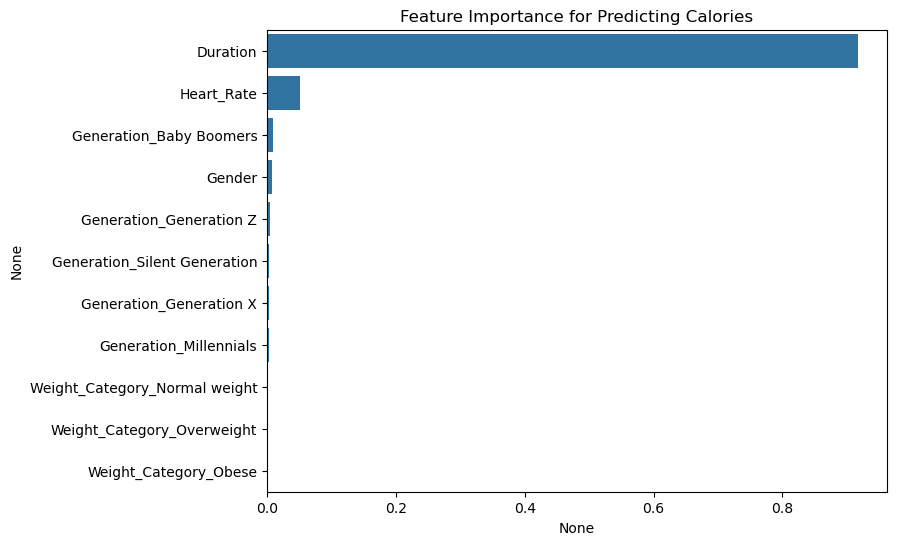

In [114]:
# Plot feature importance
plt.figure(figsize=(8,6))
sns.barplot(x=feat_importance_df, y=feat_importance_df.index)
plt.title('Feature Importance for Predicting Calories')
plt.show()

In [116]:
## GradientBoosting

In [118]:
gb_reg = GradientBoostingRegressor(max_depth=6, n_estimators=100)
gb_reg.fit(X_train_scaled, y_train)

GradientBoostingRegressor(max_depth=6)

In [120]:
pred_gb = gb_reg.predict(X_test_scaled)
print("MAE", mean_absolute_error(pred_gb, y_test))
print("RMSE", mean_squared_error(pred_gb, y_test, squared=False))
print("R2 score", gb_reg.score(X_test_scaled, y_test))

MAE 2.8137891565490087
RMSE 4.218737997615245
R2 score 0.99538755492754


C:\Users\gebruiker\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


C:\Users\gebruiker\AppData\Local\Temp\ipykernel_48008\2939224291.py:29: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame.from_dict({'Model': [name], 'Dataset': ['Train'], 'RMSE': [rmse_train], 'R2': [r2_train]})], ignore_index=True)


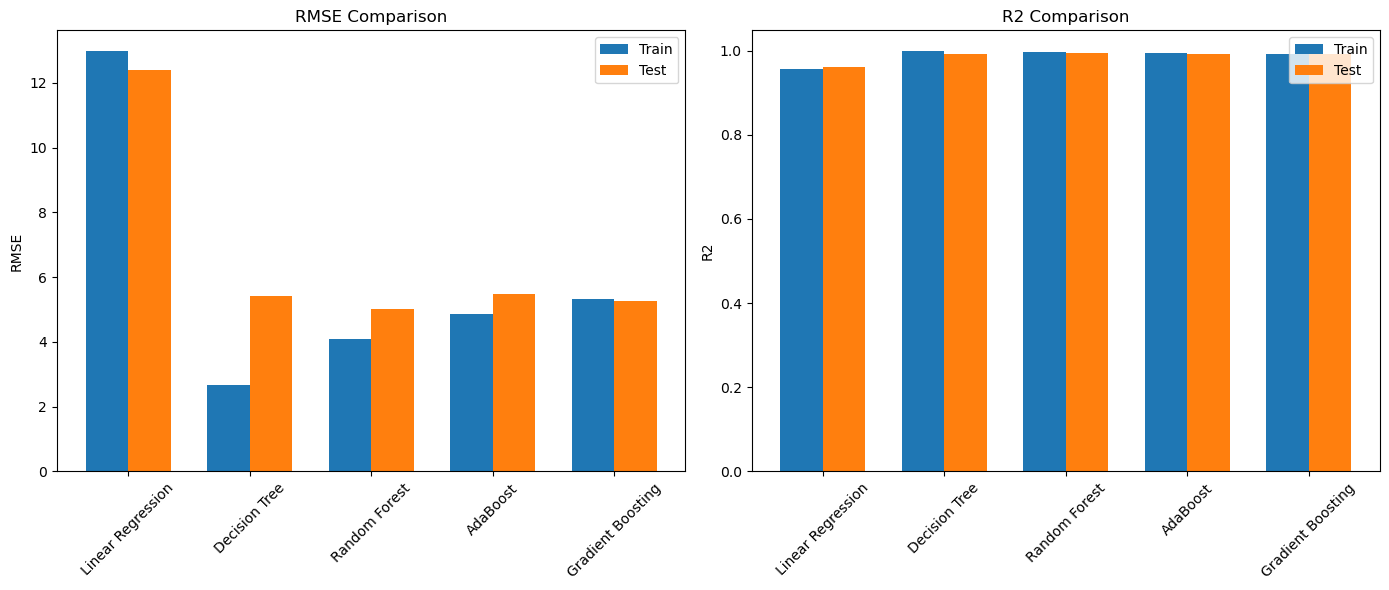

In [122]:

# Define models to evaluate
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(max_depth=10, random_state=42),
    'AdaBoost': AdaBoostRegressor(DecisionTreeRegressor(max_depth=8),
                            n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

# Initialize a DataFrame to store results
results = pd.DataFrame(columns=['Model', 'Dataset', 'RMSE', 'R2'])

# Evaluate each model
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    
    # Predict on training data
    y_train_pred = model.predict(X_train_scaled)
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    r2_train = r2_score(y_train, y_train_pred)
    
    # Predict on testing data
    y_test_pred = model.predict(X_test_scaled)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2_test = r2_score(y_test, y_test_pred)
    
    # Append results to the DataFrame
    results = pd.concat([results, pd.DataFrame.from_dict({'Model': [name], 'Dataset': ['Train'], 'RMSE': [rmse_train], 'R2': [r2_train]})], ignore_index=True)
    results = pd.concat([results, pd.DataFrame.from_dict({'Model': [name], 'Dataset': ['Test'], 'RMSE': [rmse_test], 'R2': [r2_test]})], ignore_index=True)

# Define models and metrics
models = results['Model'].unique()
metrics = ['RMSE', 'R2']
datasets = ['Train', 'Test']
x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

# Create subplots for RMSE and R²
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
for idx, metric in enumerate(metrics):
    ax = axes[idx]
    # Extract metric values for Train and Test
    train_values = results[results['Dataset'] == 'Train'][metric]
    test_values = results[results['Dataset'] == 'Test'][metric]
    
    # Plot bars side by side
    ax.bar(x - width/2, train_values, width, label='Train')
    ax.bar(x + width/2, test_values, width, label='Test')
    
    # Set titles and labels
    ax.set_title(f'{metric} Comparison')
    ax.set_xticks(x)
    ax.set_xticklabels(models, rotation=45)
    ax.set_ylabel(metric)
    ax.legend()

plt.tight_layout()
plt.show()

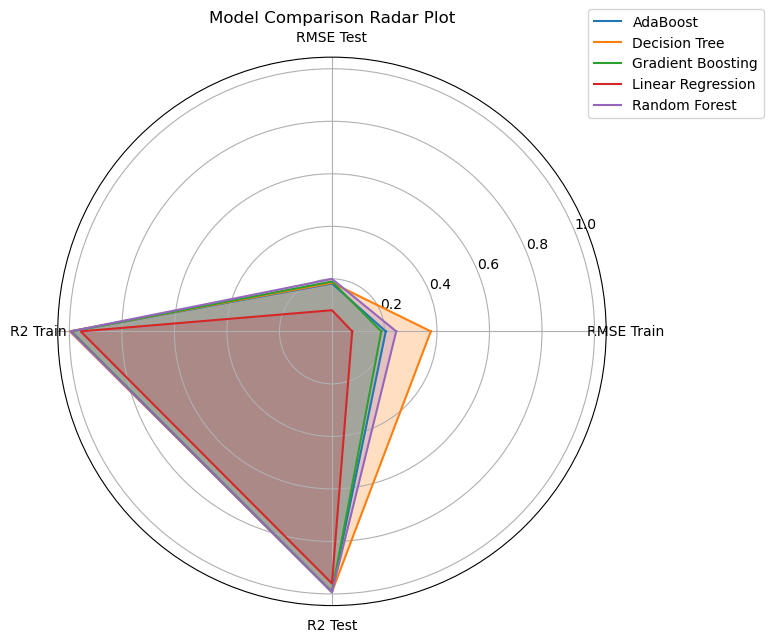

In [124]:
# Assume 'results' DataFrame exists with 'Model', 'Dataset', 'RMSE', 'R2' columns

# Pivot data for easier access
metrics_data = results.pivot(index='Model', columns='Dataset', values=['RMSE', 'R2'])

# Convert to a list for each model containing 4 metrics: RMSE Train, RMSE Test, R2 Train, R2 Test
# For consistency, invert RMSE for better visualization
metrics_data['RMSE'] = 1 / metrics_data['RMSE']

# Get list of models
models = list(metrics_data.index)

# Number of metrics per model
num_metrics = 4  # RMSE Train, RMSE Test, R2 Train, R2 Test
angles = np.linspace(0, 2 * np.pi, num_metrics, endpoint=False).tolist()

# Prepare data for radar plot
values = []

for model in models:
    rmse_train = metrics_data.loc[model, ('RMSE', 'Train')]
    rmse_test = metrics_data.loc[model, ('RMSE', 'Test')]
    r2_train = metrics_data.loc[model, ('R2', 'Train')]
    r2_test = metrics_data.loc[model, ('R2', 'Test')]
    # Create a list in the same order as angles
    model_metrics = [rmse_train, rmse_test, r2_train, r2_test]
    # Close the loop
    model_metrics += [model_metrics[0]]
    values.append(model_metrics)

# Plotting
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
for i, model_values in enumerate(values):
    ax.plot(angles + [angles[0]], model_values, label=models[i])
    ax.fill(angles + [angles[0]], model_values, alpha=0.25)

# Add labels
labels = ['RMSE Train', 'RMSE Test', 'R2 Train', 'R2 Test']
ax.set_xticks(angles)
ax.set_xticklabels(labels)

ax.set_title('Model Comparison Radar Plot')
ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.tight_layout()
plt.show()



In [140]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2', None]
}

In [142]:
gb = GradientBoostingRegressor(random_state=42)

In [144]:
grid_search = GridSearchCV(
    estimator=gb,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    cv=5,
    n_jobs=-1,
    verbose=2
)

In [146]:
grid_search.fit(X_train_scaled, y_train)
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


C:\Users\gebruiker\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.8}
Best score: -19.57835580040474


In [148]:
grid_search.best_params_

{'learning_rate': 0.1,
 'max_depth': 5,
 'max_features': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100,
 'subsample': 0.8}

In [150]:
best_model = grid_search.best_estimator_

In [152]:
# Evaluate the best model on the test set
best_pred_gb = best_model.predict(X_test_scaled)

print("MAE", mean_absolute_error(best_pred_gb, y_test))
print("RMSE", mean_squared_error(best_pred_gb, y_test, squared=False))
print("R2 score", best_model.score(X_test_scaled, y_test))


MAE 2.8889019292774623
RMSE 4.228766150309531
R2 score 0.9953656008370461


C:\Users\gebruiker\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [ ]:
# Random Search

In [1126]:
gb = GradientBoostingRegressor(random_state=42)

In [1128]:
param_dist = {
    'n_estimators': np.arange(50, 201, 25),       
    'max_depth': np.arange(3, 8),                 
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'min_samples_split': np.arange(2, 11),
    'min_samples_leaf': np.arange(1, 6),
    'max_features': ['sqrt', 'log2', None]
}

In [1130]:
random_search = RandomizedSearchCV(
    estimator=gb,
    param_distributions=param_dist,
    n_iter=50,  # number of parameter settings sampled
    scoring='neg_mean_squared_error',  # or 'r2' etc.
    cv=5,
    random_state=42,
    n_jobs=-1,
    verbose=2
)

In [1132]:
random_search.fit(X_train_scaled, y_train)
print("Best parameters:", random_search.best_params_)
print("Best score (negative MSE):", random_search.best_score_)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'subsample': 1.0, 'n_estimators': 175, 'min_samples_split': 7, 'min_samples_leaf': 3, 'max_features': None, 'max_depth': 3, 'learning_rate': 0.1}
Best score (negative MSE): -153.87683172383214


In [1144]:
best_gb = random_search.best_estimator_

In [1146]:
pred = best_model.predict(X_test_scaled)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", best_model.score(X_test_scaled, y_test))

MAE 8.635365727490496
RMSE 12.242714444664685
R2 score 0.9611562153269089


C:\Users\gebruiker\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [978]:
### Compare Before vs After Tuning

In [154]:
# Before tuning
print("Baseline GB Regressor:")
print("MAE", mean_absolute_error(pred_gb, y_test))
print("RMSE", mean_squared_error(pred_gb, y_test, squared=False))
print("R²:", gb_reg.score(X_test_scaled, y_test))

# After tuning
print("\nTuned GB Regressor:")
print("MAE:", mean_absolute_error(y_test, best_pred_gb))
print("RMSE:", mean_squared_error(y_test, best_pred_gb, squared=False))
print("R²:", best_model.score(X_test_scaled, y_test))

Baseline GB Regressor:
MAE 2.8137891565490087
RMSE 4.218737997615245
R²: 0.99538755492754

Tuned GB Regressor:
MAE: 2.8889019292774623
RMSE: 4.228766150309531
R²: 0.9953656008370461


C:\Users\gebruiker\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\gebruiker\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [980]:
## New DF with Estimated BPM


In [156]:
# Define data Estimated BPM
data = {
    "Generation": [
        "Generation Alpha", "Generation Z", "Millennials",
        "Generation X", "Baby Boomers", "Silent Generation"
    ],
    "Common Fitness Trends": [
        "Active play",
        "HIIT",
        "Endurance sports",
        "Functional fitness",
        "low-impact",
        "Gentle mobility"
    ],
    "Estimated BPM": [
        "90–140 bpm",  # Younger ages tend to have higher heart rates
        "134–190 bpm",
        "114–162 bpm",
        "95–133 bpm",
        "76–114 bpm",
        "60–100 bpm"
    ]
}
# Create DataFrame
df_bpm = pd.DataFrame(data)
# Display table
df_bpm

Generation Common Fitness Trends Estimated BPM
0   Generation Alpha           Active play    90–140 bpm
1       Generation Z                  HIIT   134–190 bpm
2        Millennials      Endurance sports   114–162 bpm
3       Generation X    Functional fitness    95–133 bpm
4       Baby Boomers            low-impact    76–114 bpm
5  Silent Generation       Gentle mobility    60–100 bpm

In [158]:
df_bpm.to_csv('generation_fitness_bpm.csv', index=False)

In [160]:
df_bpm = pd.read_csv(r"C:\Users\gebruiker\IH_LESSONS/Projects\ML_Project_3\generation_fitness_bpm.csv")
df_bpm

Generation Common Fitness Trends Estimated BPM
0   Generation Alpha           Active play    90–140 bpm
1       Generation Z                  HIIT   134–190 bpm
2        Millennials      Endurance sports   114–162 bpm
3       Generation X    Functional fitness    95–133 bpm
4       Baby Boomers            low-impact    76–114 bpm
5  Silent Generation       Gentle mobility    60–100 bpm

In [162]:
# Function to convert BPM range string to average number
def parse_bpm_range(bpm_str):
    # Remove 'bpm' and whitespace
    range_str = bpm_str.replace("bpm", "").strip()
    # Split by en dash or hyphen
    if '–' in range_str:
        low, high = range_str.split('–')
    elif '-' in range_str:
        low, high = range_str.split('-')
    else:
        # If only one number, return it as float
        return float(range_str)
    # Convert to float and compute average
    return (float(low) + float(high)) / 2

# Apply the function to create a new column
df_bpm['Ave_Estimated_BPM'] = df_bpm['Estimated BPM'].apply(parse_bpm_range)

df_bpm

Generation Common Fitness Trends Estimated BPM  Ave_Estimated_BPM
0   Generation Alpha           Active play    90–140 bpm              115.0
1       Generation Z                  HIIT   134–190 bpm              162.0
2        Millennials      Endurance sports   114–162 bpm              138.0
3       Generation X    Functional fitness    95–133 bpm              114.0
4       Baby Boomers            low-impact    76–114 bpm               95.0
5  Silent Generation       Gentle mobility    60–100 bpm               80.0

In [164]:
# Assuming df_bpm and df_new are already defined as per your data

# Step 1: Create a dictionary for generation to estimated BPM
generation_bpm_map = dict(zip(df_bpm['Generation'], df_bpm['Ave_Estimated_BPM']))

# Step 2: Create a mapping for generation to recommended exercise
generation_exercise_map = {
    'Generation Alpha': 'Active play',
    'Generation Z': 'HIIT',
    'Millennials': 'Endurance sports',
    'Generation X': 'Functional fitness',
    'Baby Boomers': 'low-impact',
    'Silent Generation': 'Gentle mobility'
}

# Step 3: Parse 'Estimated BPM' in df_bpm (not necessary here since you already have 'Average Estimated BPM')
# But if needed again, you could use the previous parse function

# Step 4: Map to create new columns in df_new
df_new['Estimated_BPM'] = df_new['Generation'].map(generation_bpm_map)
df_new['Recommended_Exercise'] = df_new['Generation'].map(generation_exercise_map)

# View the result
df_new

C:\Users\gebruiker\AppData\Local\Temp\ipykernel_48008\3955139250.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Estimated_BPM'] = df_new['Generation'].map(generation_bpm_map)


User_ID  Gender  Height  Duration  Heart_Rate  Body_Temp  Calories  \
0      14733363       1   190.0      29.0       105.0       40.8     231.0   
1      14861698       0   166.0      14.0        94.0       40.3      66.0   
2      11179863       1   179.0       5.0        88.0       38.7      26.0   
3      16180408       0   179.0      13.0       100.0       40.5      71.0   
4      17771927       0   154.0      10.0        81.0       39.8      35.0   
...         ...     ...     ...       ...         ...        ...       ...   
14995  15644082       0   193.0      11.0        92.0       40.4      45.0   
14996  17212577       0   165.0       6.0        85.0       39.2      23.0   
14997  17271188       0   159.0      16.0        90.0       40.1      75.0   
14998  18643037       1   193.0       2.0        84.0       38.3      11.0   
14999  11751526       1   173.0      18.0        92.0       40.5      98.0   

              Generation        BMI Weight_Category  Estimated_BPM  \
0           Baby Boomers  26.038781      Overweight           95.0   
1           Generation Z  21.773842   Normal weight          162.0   
2           Baby Boomers  24.655910   Normal weight           95.0   
3            Millennials  22.159109   Normal weight          138.0   
4            Millennials  24.456063   Normal weight          138.0   
...                  ...        ...             ...            ...   
14995       Generation Z  23.087868   Normal weight          162.0   
14996        Millennials  23.875115   Normal weight          138.0   
14997       Generation X  22.942130   Normal weight          114.0   
14998  Silent Generation  26.040968      Overweight           80.0   
14999       Baby Boomers  26.395803      Overweight           95.0   

      Recommended_Exercise  
0               low-impact  
1                     HIIT  
2               low-impact  
3         Endurance sports  
4         Endurance sports  
...                    ...  
14995                 HIIT  
14996     Endurance sports  
14997   Functional fitness  
14998      Gentle mobility  
14999           low-impact  

[15000 rows x 12 columns]

In [166]:
dummies = pd.get_dummies(df_new[['Generation', 'Weight_Category','Recommended_Exercise']], drop_first=False)

df_with_dummies = pd.concat([df_new, dummies], axis=1)
df_with_dummies

User_ID  Gender  Height  Duration  Heart_Rate  Body_Temp  Calories  \
0      14733363       1   190.0      29.0       105.0       40.8     231.0   
1      14861698       0   166.0      14.0        94.0       40.3      66.0   
2      11179863       1   179.0       5.0        88.0       38.7      26.0   
3      16180408       0   179.0      13.0       100.0       40.5      71.0   
4      17771927       0   154.0      10.0        81.0       39.8      35.0   
...         ...     ...     ...       ...         ...        ...       ...   
14995  15644082       0   193.0      11.0        92.0       40.4      45.0   
14996  17212577       0   165.0       6.0        85.0       39.2      23.0   
14997  17271188       0   159.0      16.0        90.0       40.1      75.0   
14998  18643037       1   193.0       2.0        84.0       38.3      11.0   
14999  11751526       1   173.0      18.0        92.0       40.5      98.0   

              Generation        BMI Weight_Category  ...  \
0           Baby Boomers  26.038781      Overweight  ...   
1           Generation Z  21.773842   Normal weight  ...   
2           Baby Boomers  24.655910   Normal weight  ...   
3            Millennials  22.159109   Normal weight  ...   
4            Millennials  24.456063   Normal weight  ...   
...                  ...        ...             ...  ...   
14995       Generation Z  23.087868   Normal weight  ...   
14996        Millennials  23.875115   Normal weight  ...   
14997       Generation X  22.942130   Normal weight  ...   
14998  Silent Generation  26.040968      Overweight  ...   
14999       Baby Boomers  26.395803      Overweight  ...   

       Generation_Millennials Generation_Silent Generation  \
0                       False                        False   
1                       False                        False   
2                       False                        False   
3                        True                        False   
4                        True                        False   
...                       ...                          ...   
14995                   False                        False   
14996                    True                        False   
14997                   False                        False   
14998                   False                         True   
14999                   False                        False   

       Weight_Category_Normal weight  Weight_Category_Obese  \
0                              False                  False   
1                               True                  False   
2                               True                  False   
3                               True                  False   
4                               True                  False   
...                              ...                    ...   
14995                           True                  False   
14996                           True                  False   
14997                           True                  False   
14998                          False                  False   
14999                          False                  False   

       Weight_Category_Overweight  Recommended_Exercise_Endurance sports  \
0                            True                                  False   
1                           False                                  False   
2                           False                                  False   
3                           False                                   True   
4                           False                                   True   
...                           ...                                    ...   
14995                       False                                  False   
14996                       False                                   True   
14997                       False                                  False   
14998                        True                                  False   
14999       

In [168]:
df_with_dummies.dtypes

User_ID                                      int64
Gender                                       int32
Height                                     float64
Duration                                   float64
Heart_Rate                                 float64
Body_Temp                                  float64
Calories                                   float64
Generation                                  object
BMI                                        float64
Weight_Category                             object
Estimated_BPM                              float64
Recommended_Exercise                        object
Generation_Baby Boomers                       bool
Generation_Generation X                       bool
Generation_Generation Z                       bool
Generation_Millennials                        bool
Generation_Silent Generation                  bool
Weight_Category_Normal weight                 bool
Weight_Category_Obese                         bool
Weight_Category_Overweight     

In [170]:
X = df_with_dummies.drop(columns = ["User_ID","Calories","Generation","Weight_Category","Recommended_Exercise","Heart_Rate","Body_Temp","Height","BMI"])
y= df_with_dummies["Calories"]

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [174]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [176]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [178]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_train_scaled.head()

Gender  Duration  Estimated_BPM  Generation_Baby Boomers  \
0  1.001501 -0.903038      -1.897543                 -0.49596   
1 -0.998501 -0.782820      -0.535481                 -0.49596   
2 -0.998501  0.178925       1.387431                 -0.49596   
3 -0.998501 -0.782820       1.387431                 -0.49596   
4  1.001501 -1.143475       0.425975                 -0.49596   

   Generation_Generation X  Generation_Generation Z  Generation_Millennials  \
0                -0.529408                -0.525149               -0.704457   
1                 1.888901                -0.525149               -0.704457   
2                -0.529408                 1.904222               -0.704457   
3                -0.529408                 1.904222               -0.704457   
4                -0.529408                -0.525149                1.419534   

   Generation_Silent Generation  Weight_Category_Normal weight  \
0                      5.187194                      -1.288245   
1                     -0.192782                       0.776250   
2                     -0.192782                       0.776250   
3                     -0.192782                       0.776250   
4                     -0.192782                       0.776250   

   Weight_Category_Obese  Weight_Category_Overweight  \
0              -0.172306                    1.371299   
1              -0.172306                   -0.729236   
2              -0.172306                   -0.729236   
3              -0.172306                   -0.729236   
4              -0.172306                   -0.729236   

   Recommended_Exercise_Endurance sports  \
0                              -0.704457   
1                              -0.704457   
2                              -0.704457   
3                              -0.704457   
4                               1.419534   

   Recommended_Exercise_Functional fitness  \
0                                -0.529408   
1                                 1.888901   
2                                -0.529408   
3                                -0.529408   
4                                -0.529408   

   Recommended_Exercise_Gentle mobility  Recommended_Exercise_HIIT  \
0                              5.187194                  -0.525149   
1                             -0.192782                  -0.525149   
2                             -0.192782                   1.904222   
3                             -0.192782                   1.904222   
4                             -0.192782                  -0.525149   

   Recommended_Exercise_low-impact  
0                         -0.49596  
1                         -0.49596  
2                         -0.49596  
3                         -0.49596  
4                         -0.49596

In [180]:
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)
X_test_scaled.head()

Gender  Duration  Estimated_BPM  Generation_Baby Boomers  \
0 -0.998501 -0.782820       0.425975                 -0.49596   
1  1.001501 -1.143475       0.425975                 -0.49596   
2 -0.998501  0.780015       0.425975                 -0.49596   
3  1.001501  1.621542       0.425975                 -0.49596   
4 -0.998501  0.419361      -1.897543                 -0.49596   

   Generation_Generation X  Generation_Generation Z  Generation_Millennials  \
0                -0.529408                -0.525149                1.419534   
1                -0.529408                -0.525149                1.419534   
2                -0.529408                -0.525149                1.419534   
3                -0.529408                -0.525149                1.419534   
4                -0.529408                -0.525149               -0.704457   

   Generation_Silent Generation  Weight_Category_Normal weight  \
0                     -0.192782                        0.77625   
1                     -0.192782                        0.77625   
2                     -0.192782                        0.77625   
3                     -0.192782                        0.77625   
4                      5.187194                        0.77625   

   Weight_Category_Obese  Weight_Category_Overweight  \
0              -0.172306                   -0.729236   
1              -0.172306                   -0.729236   
2              -0.172306                   -0.729236   
3              -0.172306                   -0.729236   
4              -0.172306                   -0.729236   

   Recommended_Exercise_Endurance sports  \
0                               1.419534   
1                               1.419534   
2                               1.419534   
3                               1.419534   
4                              -0.704457   

   Recommended_Exercise_Functional fitness  \
0                                -0.529408   
1                                -0.529408   
2                                -0.529408   
3                                -0.529408   
4                                -0.529408   

   Recommended_Exercise_Gentle mobility  Recommended_Exercise_HIIT  \
0                             -0.192782                  -0.525149   
1                             -0.192782                  -0.525149   
2                             -0.192782                  -0.525149   
3                             -0.192782                  -0.525149   
4                              5.187194                  -0.525149   

   Recommended_Exercise_low-impact  
0                         -0.49596  
1                         -0.49596  
2                         -0.49596  
3                         -0.49596  
4                         -0.49596

In [182]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train_scaled, y_train)

KNeighborsRegressor(n_neighbors=10)

In [184]:
knn.score(X_test_scaled, y_test)

C:\Users\gebruiker\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\gebruiker\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


0.956535220758278

In [186]:
##GradientBoosting
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=20)
gb_model.fit(X_train_scaled, y_train)

GradientBoostingRegressor(random_state=20)

In [188]:
pred_gb = gb_model.predict(X_test_scaled)

print("MAE", mean_absolute_error(pred_gb, y_test))
print("RMSE", mean_squared_error(pred_gb, y_test, squared=False))
print("R2 score", gb_model.score(X_test_scaled, y_test))

MAE 8.524091770557906
RMSE 11.972088140445244
R2 score 0.9628545256036798


C:\Users\gebruiker\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


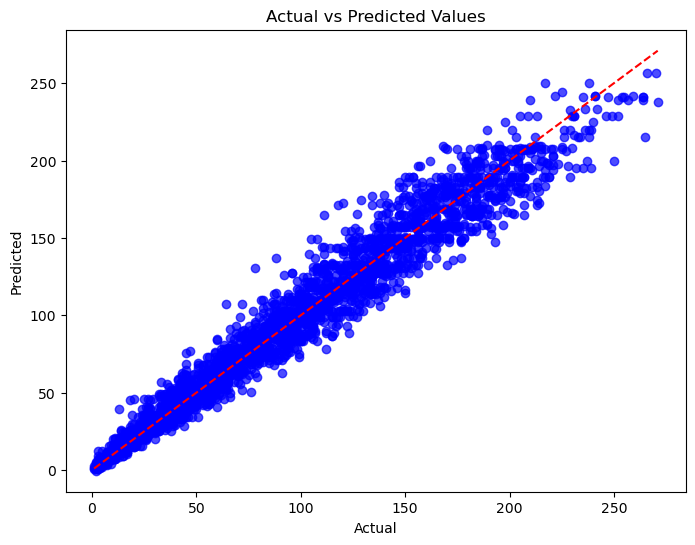

In [190]:
# Plot actual vs predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, pred_gb, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

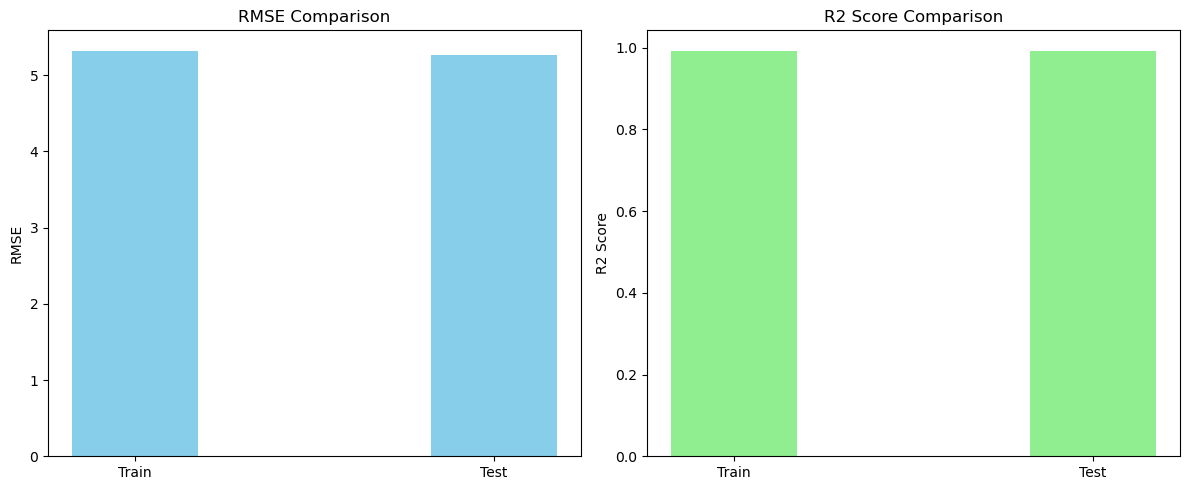

In [192]:
# Calculate metrics
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

# Create a DataFrame with each dataset as a separate row
results_df = pd.DataFrame({
    'Dataset': ['Train', 'Test'],
    'RMSE': [rmse_train, rmse_test],
    'R2': [r2_train, r2_test]
})

# Plotting comparison
x = np.arange(len(results_df))
width = 0.35

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot RMSE
axes[0].bar(x, results_df['RMSE'], width, color='skyblue')
axes[0].set_title('RMSE Comparison')
axes[0].set_xticks(x)
axes[0].set_xticklabels(results_df['Dataset'])
axes[0].set_ylabel('RMSE')

# Plot R2
axes[1].bar(x, results_df['R2'], width, color='lightgreen')
axes[1].set_title('R2 Score Comparison')
axes[1].set_xticks(x)
axes[1].set_xticklabels(results_df['Dataset'])
axes[1].set_ylabel('R2 Score')

plt.tight_layout()
plt.show()


In [194]:
gb = GradientBoostingRegressor(random_state=42)

In [196]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

In [198]:
grid_search = GridSearchCV(estimator=gb, param_grid=param_grid, 
                           scoring='neg_root_mean_squared_error', # Choose your metric
                           cv=5, n_jobs=-1, verbose=2)

In [200]:
grid_search.fit(X_train_scaled, y_train)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


C:\Users\gebruiker\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_root_mean_squared_error', verbose=2)

In [201]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 50}

In [202]:
best_model = grid_search.best_estimator_

In [203]:
best_model.fit(X_train_scaled,y_train)

GradientBoostingRegressor(max_depth=10, max_features='sqrt', min_samples_leaf=4,
                          n_estimators=50, random_state=42)

In [204]:
pred = best_model.predict(X_test_scaled)

print("MAE", mean_absolute_error(pred, y_test))
print("RMSE", mean_squared_error(pred, y_test, squared=False))
print("R2 score", best_model.score(X_test_scaled, y_test))

MAE 8.635365727490496
RMSE 12.242714444664685
R2 score 0.9611562153269089


C:\Users\gebruiker\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


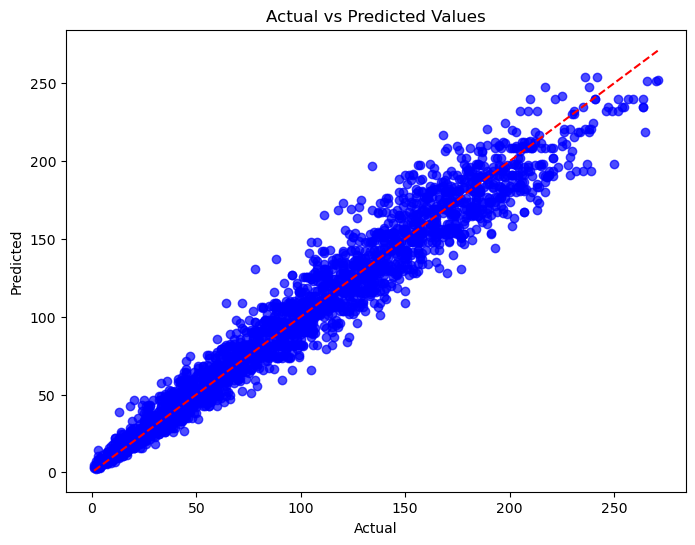

In [210]:
# Plot actual vs predicted
plt.figure(figsize=(8,6))
plt.scatter(y_test, pred, alpha=0.7, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

In [212]:
comparison_df = pd.DataFrame({
    'Calories': df_new.iloc[:len(pred)]['Calories'],
    'Prediction': pred
})

# Display the new DataFrame
comparison_df

Calories  Prediction
0        231.0   39.180352
1         66.0   19.128844
2         26.0  125.569365
3         71.0  197.663943
4         35.0  117.138711
...        ...         ...
2995     109.0   92.815383
2996      47.0  133.810242
2997     164.0   32.692957
2998      62.0  142.744093
2999     141.0  139.242203

[3000 rows x 2 columns]

In [214]:
comparison_df['Prediction'] = comparison_df['Prediction'].round(1)
comparison_df.head()

Calories  Prediction
0     231.0        39.2
1      66.0        19.1
2      26.0       125.6
3      71.0       197.7
4      35.0       117.1

In [216]:
# Create a new column 'Comparison' with 'Yes' if Prediction > Calories, else 'No'
comparison_df['Comparison'] = comparison_df.apply(
    lambda row: 'Yes' if row['Prediction'] > row['Calories'] else 'No',
    axis=1
)

# Display the updated DataFrame
print(comparison_df)

      Calories  Prediction Comparison
0        231.0        39.2         No
1         66.0        19.1         No
2         26.0       125.6        Yes
3         71.0       197.7        Yes
4         35.0       117.1        Yes
...        ...         ...        ...
2995     109.0        92.8         No
2996      47.0       133.8        Yes
2997     164.0        32.7         No
2998      62.0       142.7        Yes
2999     141.0       139.2         No

[3000 rows x 3 columns]


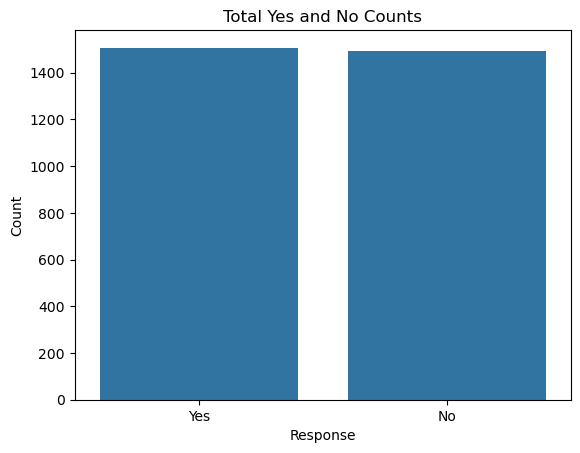

In [218]:
# Count the number of 'Yes' and 'No'
counts = comparison_df['Comparison'].value_counts()

# Plot using seaborn
sns.barplot(x=counts.index, y=counts.values)
plt.xlabel('Response')
plt.ylabel('Count')
plt.title('Total Yes and No Counts')
plt.show()

In [220]:
df_new = df_new.merge(comparison_df[['Prediction','Comparison']], left_index=True, right_index=True, how='left')
df_new

User_ID  Gender  Height  Duration  Heart_Rate  Body_Temp  Calories  \
0      14733363       1   190.0      29.0       105.0       40.8     231.0   
1      14861698       0   166.0      14.0        94.0       40.3      66.0   
2      11179863       1   179.0       5.0        88.0       38.7      26.0   
3      16180408       0   179.0      13.0       100.0       40.5      71.0   
4      17771927       0   154.0      10.0        81.0       39.8      35.0   
...         ...     ...     ...       ...         ...        ...       ...   
14995  15644082       0   193.0      11.0        92.0       40.4      45.0   
14996  17212577       0   165.0       6.0        85.0       39.2      23.0   
14997  17271188       0   159.0      16.0        90.0       40.1      75.0   
14998  18643037       1   193.0       2.0        84.0       38.3      11.0   
14999  11751526       1   173.0      18.0        92.0       40.5      98.0   

              Generation        BMI Weight_Category  Estimated_BPM  \
0           Baby Boomers  26.038781      Overweight           95.0   
1           Generation Z  21.773842   Normal weight          162.0   
2           Baby Boomers  24.655910   Normal weight           95.0   
3            Millennials  22.159109   Normal weight          138.0   
4            Millennials  24.456063   Normal weight          138.0   
...                  ...        ...             ...            ...   
14995       Generation Z  23.087868   Normal weight          162.0   
14996        Millennials  23.875115   Normal weight          138.0   
14997       Generation X  22.942130   Normal weight          114.0   
14998  Silent Generation  26.040968      Overweight           80.0   
14999       Baby Boomers  26.395803      Overweight           95.0   

      Recommended_Exercise  Prediction Comparison  
0               low-impact        39.2         No  
1                     HIIT        19.1         No  
2               low-impact       125.6        Yes  
3         Endurance sports       197.7        Yes  
4         Endurance sports       117.1        Yes  
...                    ...         ...        ...  
14995                 HIIT         NaN        NaN  
14996     Endurance sports         NaN        NaN  
14997   Functional fitness         NaN        NaN  
14998      Gentle mobility         NaN        NaN  
14999           low-impact         NaN        NaN  

[15000 rows x 14 columns]